## Using Message Passing Attention Graph Neural Networks for Document Classification

#### Names: Meghna Patel & Serezam Monira

####  Emails: meghna.patel@ryerson.ca & serazam.monira@ryerson.ca

In [8]:
from IPython.display import Image

# 1.0 Introduction

### 1.1 Problem Description

Use of statistical and deep learning methods for text/document classification are seen across multiple industries. However, little to no research demonstrates the benefits of non-traditional classifiers such as Graph Neural Networks (GNN) over current approaches. 


### 1.2 Context of the Problem

Document classification is the task of assigning a document to one or more categories based on its content. Understanding the challenge to classify large amounts of documents manually, document classification using machine learning techniques becomes of interest. Many state-of-the-art classification models are proposed for this problem, including Naïve Bayes, Support Vector Machines (SVM), Decision Trees, Random Forest & Neural Networks. Though these baseline models result in acceptable performance, studies indicate other lesser explored techniques to outperform these baseline models.

### 1.3 Limitation About other Approaches

Modeling data as graphs has resulted in success across multiple domains including bioinformatics, social media & image recognition [1]. However, only a handful of studies have focused on application of GNN to NLP tasks [2]. Probabilistic and deep learning approaches effectively perform text classification. However, exploiting graphical representation of text leads to better results than traditional word embedding and automatic feature extractions methods [3]. The underlying efficiency of graphs is attributed to its ability to understand the global corpus. 


### 1.4 Solution

The following research explores GNN models for document classification. GNN are capable of handling large complex structures and retaining global information [4]. This research proposes Message Passing GNN for document understanding. This is a replication study based on the paper Message Passing Attention Networks for Document Understanding [2].


# 2.0 Background

|Reference|Explanation|Dataset/Input|Weakness|
|:-|:-|:-|:-|
|S Sinha et al. [3]|The research used a Graph Convolutional Network (GCN) for text classification.|20NG, Ohsumed23 & MR|Achieved a max accuracy of only 70%|
|Y Zhang et al. [7]|This paper proposed TextING, an inductive text classification approach using GNN. In this approach each text got its own structural graph.|Ohsumed23, R52, R8 & MR| Performance decreased as the number of layers increased (i.e. more neighbors were considered)|
|Gilmer et al. [8]|They proposed a message passing framework that can be applied to GNN for predicting quantum properties of organic molecules.|QM9|They recommended adding an attention mechanism to generalise the approach to larger graph.|
|Peng et al. [9]|The research combines graphs and convolutional neural networks (CNN) to exploit advantages of both models for text classification.|RCV1 & NYTimes|There are no notable weaknesses. However, the researchers do see an opportunity to improve their model for complex text structures.|
|Yao et al. [5]|The researchers built a single undirected graph for the dataset, containing word and document nodes. They adopted a semi-supervised node classification approach for classification and compared results to baseline models including CNN, LSTM, etc. |20NG, Ohsumed23, R52, R8 & MR|They recommend using an attention mechanism and unsupervised framework for large unlabeled data.|
|Zhang et al. [10]|The researchers explain that previous applications of GNN to text classification are not scalable to large corpuses and ignore heterogeneity of the text graph. To overcome these issues, the study proposes a transformer based GNN called Text Graph Transformer. The model is compared to Text GNN, Text GCN and other RNNs|R8, R52, Ohsumed, IMDB & Yelp 2014|In most situations Text Graph Transformer models outperform baseline models, however a decline is accuracy is seen when embeddings are initialized randomly|

# 3.0 Methodology

The following section details the methodology used for this project as adopted from the research Message Passing Attention Networks for Document Understand. In the original paper, the authors extend the vanilla model to include hierarchical variants. For this study, the scope is limited to the vanilla model for document classification.  This section explains the message passing framework and the experiments conducted.

### 3.1 Build a Graph Representation of Text

The following section explains the process to generate graph representations of text. In order to apply GNN for document classification it is important to represent documents as graphs. This is done by representing a document as a word co-occurrence networks with a sliding window of two overspanning sentences. In this study we represent documents as directed, weighted graphs [2]. Let us denote a graph by G = (V, E), where V is the node set and E is the edge set. G is represented as: 

**Nodes**: Each unique word in the document is a node in G. 

**Edges**: A natural way to build graphs representations for text is word co-occurrence. An edge is added between a pair of nodes if the nodes (words) are found together in at least one instantiation of the window spanning two sentences.

**Direction**: In our representation, the direction of each edge captures text flow.

**Weights**: Weights assigned to each edge captures the number of co-occurrences.

**Master Node**: The master node is a special document node [1] that connects to all other nodes in the graph through unit weight bi-directional edges. 


                                           Figure 1: Graph representation of a document [2]
<div>
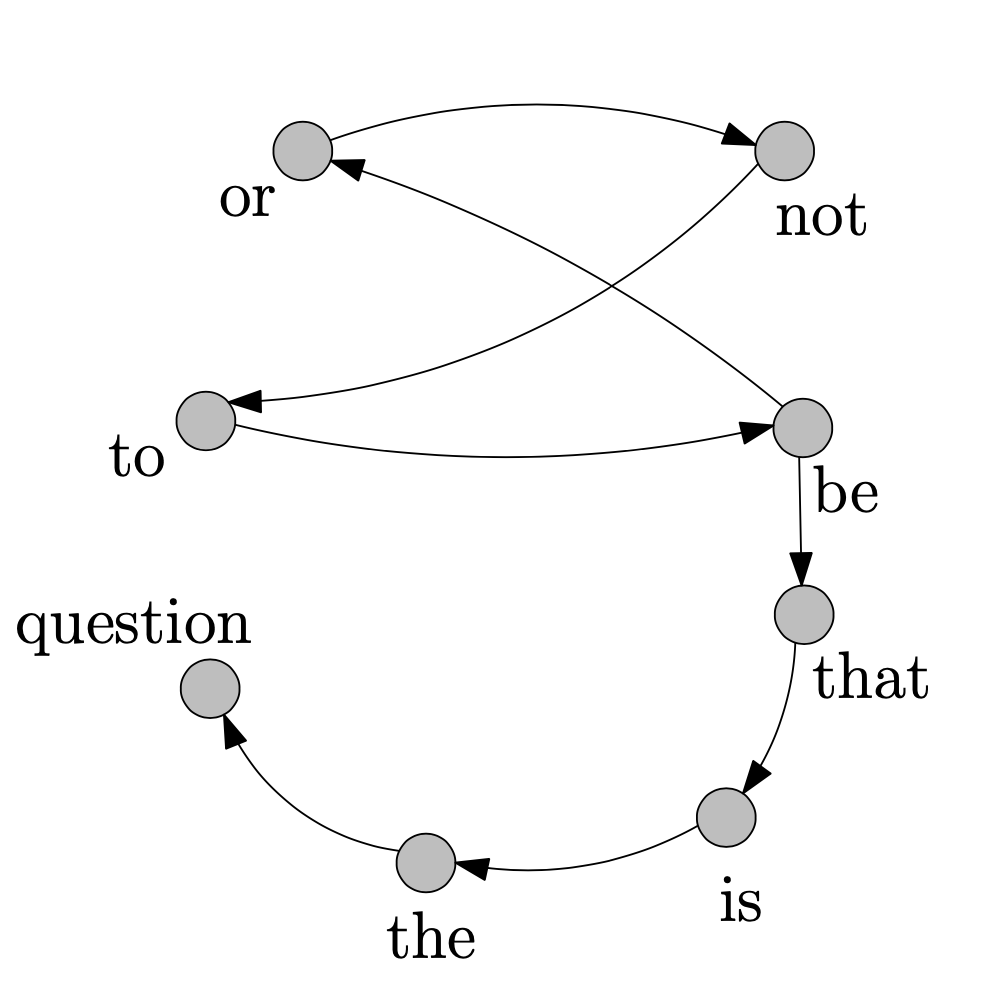
</div>

In order to process the graphs using programming languages, graph representations of each document are defined by an adjacency matrix (A). An adjacency matrix is a 2-dimensional matrix of size N x N, where N is equal to the number of nodes (vertices) in the graph. In a directed graph, the adjacency matrix can be asymmetric. In our matrix representation of each document, a non-zero element Aij indicates a weighted edge from node i to node j. 

                      Figure 2: Graph representation of a document and its corresponding adjacency matrix 

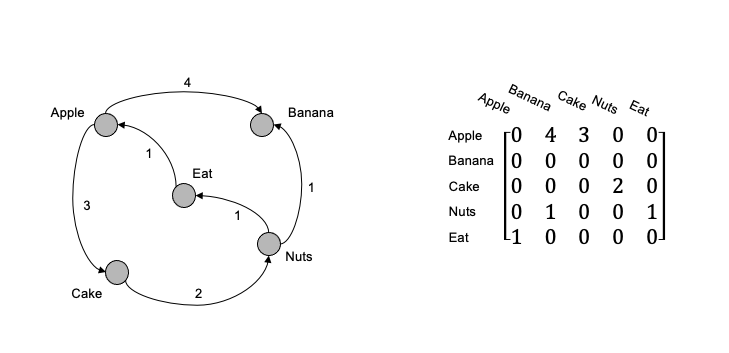

### 3.2 Message Passing
The following section explains the message passing algorithm. The application of message passing (MP) on graphs is proposed by Gilmer [8]. MP in GNN is done in two main phases; aggregation phase and combine (update) phase [2]. In a MP framework, embeddings corresponding to each node in the graph are updated based on information aggregated from its neighbourhood [2]. The aggregate and update functions are arbitrary functions. The updated embedding, for each node, is then computed by combining the current feature vector with the message vector.

Messages are passed for T time steps (or T iterations). After the first iteration (T = 1), each node embedding stores information about its immediate neighbours. At T = 2, the second iteration, each node embedding contains information from its 2-hop neighbourhood [12]. In this manner, at T = k, each node embedding will contain information from its k-hop neighbours (i.e., information about all neighbours in subtree of height k). 

**Aggregation Phase**
At time T = 1, the message matrix for each node is computed based on information from its neighbours. The aggregate function used for this project is as follows [2]: 

$${M}^{(t+1)}={MLP}^{(t+1)}({D}^{(-1)}A{H}^{(t)})$$

**H** is the state embedding (node feature), an s-dimensional vector of node v. H is updated at each iteration to include information about its neighbours. In order to initialise H, we used 300-dimensional pre-trained Google News vectors made publicly available by Google [14].

**A** is the adjacency matrix representation of the graph G as described in section 3.1. 

**D** is the diagonal in-degree (incoming edges of a node) matrix of the graph G. 

**MLP** denotes a multi-layer perceptron.

**M** is the message matrix that will be used to update the state embedding of each node.

                           Figure 3: Visual representation of the aggregation phase on a single node. Node 
                           A aggregates messages from its  neighbours, that in turn aggregate messages from 
                           their respective neighbours [12].
<div>
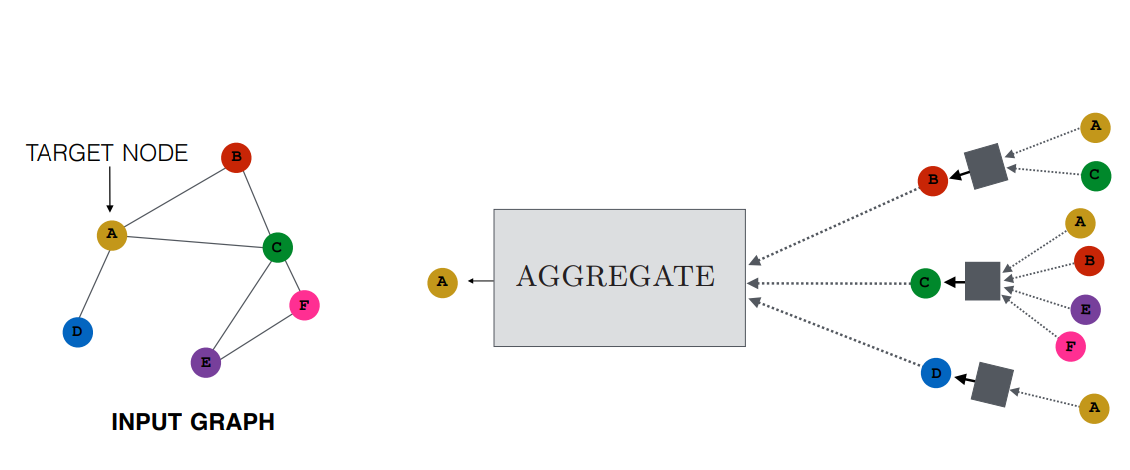
</div>

**Combine (Update) Phase**
The updated embedding is then built by combining the current feature vector with the message vector for each node. This process can be represented mathematically as follows [2]:  

$${H}^{(t+1)}={GRU}^{(k)}({H}^{(t)},{M}^{(t+1)})$$

In the equation it can be seen that Grated Recurrent Unit is choosen as the combine (update) function for this research. 

**Readout** In order to build a vector representaion for the whole graph for classification it is necessary to apply a readout function [13]. The goal of a readout function is to aggregate the computed hidden vertex representation of all nodes into a single graph level representation. The readout function can be a simple function such as sum or mean, or it can be rigorous [13]. In this research, our readout function applies global self-attention to the final node representation matrix [2]. 

To obtain our final embedding, a master node is integrated into the representation, similar to the approach taken in the paper The Graph Neural Network Model [1]. The purpose of the master node is to store global information about the document such as vocabulary. This is achieved by omitting the master node in the readout phase [2].

### 3.3 Datasets
The quality of document embeddings learned by the model are measured using 3 document classification datasets. In this section we describe the datasets used for our experiments. The original paper measured the quality of the GNN model on 10 classification datasets, namely, Reuters, BBCSport, RT-Polarity, Subjectivity, MPQA, IMDB, TREC, SST-1, SST-2 and Yelp2013. For the purpose of this replica study we used two datasets directly from the original paper (RT-Polarity and Subjectivity) and introduced a third dataset (BBC) not used in the original paper. 

|Dataset Name|Data Description|No. of Training Samples|No. of Test Samples|No. of Classes|
|:-|:-|:-|:-|:-|
|RT-Polarity [15]|RT-Polarity is a preprocessed dataset containing 5331 positive and 5331 negative movie reviews from Rotten Tomatoes|10,662|10-fold cross-validation|2|
|Subjectivity [16]|Subjectivity is a preprocessed dataset containing movie review snippets from Rotten Tomatoes & IMDB plot summaries |10,000|10-fold cross-validation|2|
|BBC [17]|BBC is a dataset containing labeled new articles from BBC news website from 2004-2005|2,225|10-fold cross-validation|5|

### 3.4 Experimental Setup

The research began with data preparation. Data preparation is the process of cleaning and preparing the data for analysis. Each dataset is passed through a series of steps to prepare it for further analysis. Preparatory steps include (1) eliminating special characters, punctuations and leading (or trailing) white spaces, (2) changing characters to lower case, (3) tokenizing documents into words and (4) encoding labels to numeric values.

Following data preparation, a graph representation is created for each document. Each document, in its graph representation is defined by an adjacency matrix as described in section 3.1. In addition to building the adjacency matrix for each document, node embeddings (features) are also learned. For the purpose of this research, publicly available word2vec vectors trained on 100 billion words from Google News are used to initialize node vectors [14]. If a word is not present in the pre-trained embeddings, its vector representation is initialized randomly. This procedure is handled by the load_embeddings method in the utils.py file. In this manner, our input to the GNN can be regarded as a graph of vectors [2].

For the purpose of training and testing the model, 10-fold cross validation (CV) is used. Further, at each fold, 10% of the training set is randomly sampled to build the validation set [2].

Recall, in a MP framework, messages are passed for T time steps. In this research, T = 2 is selected and each step is implemented using a different layer of the MP framework. In this manner we induce embeddings vectors of nodes based on properties of their neighborhood nodes [5]. Following MP, the output of the readout phase is passed through a dense layer before reaching the classification stage. All dense layers use ReLU activation. For the classification layer, softmax activation is used. The model is trained by minimizing the cross-entropy loss function. 

The GNN model is evaluated on three classification datasets described in section 3.3. The mean (average) test set classification accuracy is determined and results are compared against baseline models.

The GNN is evaluated against state-of-the-art baseline models; Long Short-Term Memory (LSTM) and Feed Forward Neural Network (FFNN). Both models are initialized using pre-trained Google News embeddings [14]. The models are trained using the same datasets as the GNN (RT-Polarity, Subjectivity, BBC) using 10-fold CV. At each fold, 10% of the data is used for defining the validation set. In this manner the mean accuracy for each dataset is obtained. The implementation for the LSTM and FFNN models, in Python, can be found in Baseline_Model_LSTM.ipynb and Baseline_Model_FeedForward.ipynb respectively. 

# Implementation

The following section provides the implementation of the GNN written Python language. Since this is a replica project, the code for this project was adopted from the original paper. 
As discussed in section 3.4, the GNN was compared against two state-of-the-art baseline models; LSTM and FFNN. The code for both these models was not included in the original paper. Our implementation of LSTM and FFNN models can be found in the files Baseline_Model_LSTM.ipynb and Baseline_Model_FeedForward.ipynb within the src folder in our GitHub repository.

In [1]:
# We start by installing the required packages 
# conda install -c pytorch pytorch
# conda install smart_open==2.0.0
# conda install -c anaconda gensim
#!unzip GoogleNews-vectors-negative300.bin.zip 

Import required libraries. Implementation for helper functions used by the GNN are included in .py files outside this notebook. These functions are imported into this notebook here. 

In [4]:
%%capture
# import libraries 
import time
import argparse
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from math import ceil

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR

import smart_open
smart_open.open = smart_open.smart_open

import numpy as np
import scipy.sparse as sp
import re
from math import ceil
from scipy.sparse import csr_matrix, lil_matrix
import torch
from gensim.models.keyedvectors import KeyedVectors

# load helper functions defined in .py files
from src.utils import load_file, preprocessing, get_vocab, load_embeddings, create_gows, accuracy, generate_batches, AverageMeter
from src.models import MPAD

This is the main function. This function takes a set of arguments (args) as input as outputs the mean classification accuracy for a given dataset. 
The main components of this function include: 
1. Reading the dataset & class labels and preparing the data as explained in section 3.4
2. Building the embedding matrix using Google News Embeddings 
3. Building the adjacency matrix for each document, and corresponding node embeddings (features)
4. Training the model using 10-fold CV
5. Returning the mean test set accuracy

The model is trained in an end-to-end manners by minimizing the cross entropy loss function. Adam is selected as the optimization algorithm with an initial learning rate of 0.001. A dropout rate of 0.5 is used in order to prevent overfitting. The maximum number of epoches is set to 200, and the best epoch (model) is used at each CV iteration. Once CV is complete, the mean test set accuracy is returned. 

In [25]:
def main(args):
    # read & prepare (clean) the data 
    docs, class_labels = load_file(args['path_to_dataset']) # get documents and labels
    docs = preprocessing(docs) # clean/prepare the documents 

    # encode labels
    enc = LabelEncoder()
    class_labels = enc.fit_transform(class_labels)

    nclass = np.unique(class_labels).size # get number of labels (classes)
    y = list()
    for i in range(len(class_labels)):
        t = np.zeros(1)
        t[0] = class_labels[i] # store each class label in an array object
        y.append(t) # append array object to list y

    vocab = get_vocab(docs) # get list of unique words in our document collection
    embeddings = load_embeddings(args['path_to_embeddings'], vocab) # build embedding matrix

    # the following line of code builds the adjacency matrix and node features using the dataset 
    adj, features, _ = create_gows(docs, vocab, args['window_size'], args['directed'], 
                                   args['normalize'], args['use_master_node'])

    kf = KFold(n_splits=10, shuffle=True) # 10 fold cross validation
    it = 0
    accs = list()

    # 10 fold cross validation starts 
    for train_index, test_index in kf.split(y): # generate indices to split data into training and test set.
        it += 1

        # build validation set from the training set 
        idx = np.random.permutation(train_index)
        train_index = idx[:int(idx.size*0.9)].tolist()
        val_index = idx[int(idx.size*0.9):].tolist()

        # get length of training, validation and test sets 
        n_train = len(train_index)
        n_val = len(val_index)
        n_test = len(test_index)

        adj_train = [adj[i] for i in train_index] # get adjacency matrix for training documents
        features_train = [features[i] for i in train_index] # get features for training documents
        y_train = [y[i] for i in train_index] # get labels for training documents

        # we do the same as above, but for the validation set
        adj_val = [adj[i] for i in val_index]
        features_val = [features[i] for i in val_index]
        y_val = [y[i] for i in val_index]

        # we do the same as above, but for the test set 
        adj_test = [adj[i] for i in test_index]
        features_test = [features[i] for i in test_index]
        y_test = [y[i] for i in test_index]

        
        # we build our batch for forward/backward pass
        adj_train, features_train, batch_n_graphs_train, y_train = generate_batches(adj_train, 
                                                                                    features_train, 
                                                                                    y_train, 
                                                                                    args['batch_size'], 
                                                                                    args['use_master_node'])

        adj_val, features_val, batch_n_graphs_val, y_val = generate_batches(adj_val, 
                                                                            features_val, 
                                                                            y_val, 
                                                                            args['batch_size'], 
                                                                            args['use_master_node'])

        adj_test, features_test, batch_n_graphs_test, y_test = generate_batches(adj_test, 
                                                                                features_test, 
                                                                                y_test, 
                                                                                args['batch_size'], 
                                                                                args['use_master_node'])

        n_train_batches = ceil(n_train/args['batch_size'])
        n_val_batches = ceil(n_val/args['batch_size'])
        n_test_batches = ceil(n_test/args['batch_size'])

        # model and optimizer, initalize the model 
        model = MPAD(embeddings.shape[1], 
                     args['message_passing_layers'], 
                     args['hidden'], 
                     args['penultimate'], 
                     nclass, 
                     args['dropout'], 
                     embeddings, 
                     args['use_master_node'])

        parameters = filter(lambda p: p.requires_grad, model.parameters())
        optimizer = optim.Adam(parameters, lr=args['lr'])
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

        if args['cuda']:
            model.cuda()
            adj_train = [x.cuda() for x in adj_train]
            features_train = [x.cuda() for x in features_train]
            batch_n_graphs_train = [x.cuda() for x in batch_n_graphs_train]
            y_train = [x.cuda() for x in y_train]
            adj_val = [x.cuda() for x in adj_val]
            features_val = [x.cuda() for x in features_val]
            batch_n_graphs_val = [x.cuda() for x in batch_n_graphs_val]
            y_val = [x.cuda() for x in y_val]
            adj_test = [x.cuda() for x in adj_test]
            features_test = [x.cuda() for x in features_test]
            batch_n_graphs_test = [x.cuda() for x in batch_n_graphs_test]
            y_test = [x.cuda() for x in y_test]

        def train(epoch, adj, features, batch_n_graphs, y):
            optimizer.zero_grad()
            output = model(features, adj, batch_n_graphs)
            loss_train = F.cross_entropy(output, y)
            loss_train.backward()
            optimizer.step()
            return output, loss_train

        def test(adj, features, batch_n_graphs, y):
            output = model(features, adj, batch_n_graphs)
            loss_test = F.cross_entropy(output, y)
            return output, loss_test

        best_acc = 0
        
        # epoches 
        for epoch in range(args['epochs']):
            scheduler.step()

            start = time.time()
            model.train()
            train_loss = AverageMeter()
            train_acc = AverageMeter()

            # Train for one epoch
            for i in range(n_train_batches):
                output, loss = train(epoch, adj_train[i], features_train[i], batch_n_graphs_train[i], y_train[i])
                train_loss.update(loss.item(), output.size(0))
                train_acc.update(accuracy(output.data, y_train[i].data), output.size(0))

            # Evaluate on validation set
            model.eval()
            val_loss = AverageMeter()
            val_acc = AverageMeter()

            for i in range(n_val_batches):
                output, loss = test(adj_val[i], features_val[i], batch_n_graphs_val[i], y_val[i])
                val_loss.update(loss.item(), output.size(0))
                val_acc.update(accuracy(output.data, y_val[i].data), output.size(0))

            # Print results
            print("Cross-val iter:", '%02d' % it, "epoch:", '%03d' % (epoch + 1), "train_loss=", "{:.5f}".format(train_loss.avg),
                "train_acc=", "{:.5f}".format(train_acc.avg), "val_loss=", "{:.5f}".format(val_loss.avg),
                "val_acc=", "{:.5f}".format(val_acc.avg), "time=", "{:.5f}".format(time.time() - start))

            # Remember best accuracy and save checkpoint
            is_best = val_acc.avg >= best_acc
            best_acc = max(val_acc.avg, best_acc)
            if is_best:
                early_stopping_counter = 0
                torch.save({
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer' : optimizer.state_dict(),
                }, 'model_best.pth.tar')
            else:
                early_stopping_counter += 1
                print("EarlyStopping: %i / %i" % (early_stopping_counter, args['patience']))
                if early_stopping_counter == args['patience']:
                    print("EarlyStopping: Stop training")
                    break

        print("Optimization finished!")

        # Testing
        test_loss = AverageMeter()
        test_acc = AverageMeter()
        print("Loading checkpoint!")
        checkpoint = torch.load('model_best.pth.tar') # load best epoch saved at checkpoint
        epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])

        for i in range(n_test_batches):
            output, loss = test(adj_test[i], features_test[i], batch_n_graphs_test[i], y_test[i])
            test_loss.update(loss.item(), output.size(0))
            test_acc.update(accuracy(output.data, y_test[i].data), output.size(0))
        accs.append(test_acc.avg.cpu().numpy()) # save accuracy in an array

        # Print results
        print("test_loss=", "{:.5f}".format(test_loss.avg), "test_acc=", "{:.5f}".format(test_acc.avg))
        print()
        
    # print final mean accuracy on the test set 
    print("Average accuracy on test set using graph model: ", "{:.5f}".format(np.mean(accs)))
    return np.mean(accs)

#### Run model on datasets

In the following section, the GNN is trained using the 3 datasets; subjectivity, BBC and rt-polarity. The final mean accuracy is shown for each dataset. 

##### Subjectivity dataset

In [31]:
# define arguments to be fed to the main function 
args_sub = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/subjectivity.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_sub['cuda'] = not args_sub['no_cuda'] and torch.cuda.is_available()

In [33]:
acc_sub = main(args_sub)

Vocabulary size:  21322
Existing vectors: 17913
Cross-val iter: 01 epoch: 001 train_loss= 0.34930 train_acc= 0.83975 val_loss= 0.25774 val_acc= 0.88778 time= 11.03957
Cross-val iter: 01 epoch: 002 train_loss= 0.27212 train_acc= 0.88901 val_loss= 0.22376 val_acc= 0.90667 time= 11.10204
Cross-val iter: 01 epoch: 003 train_loss= 0.25235 train_acc= 0.89988 val_loss= 0.23822 val_acc= 0.90667 time= 11.09562
Cross-val iter: 01 epoch: 004 train_loss= 0.23626 train_acc= 0.90407 val_loss= 0.24417 val_acc= 0.90111 time= 11.18734
EarlyStopping: 1 / 20
Cross-val iter: 01 epoch: 005 train_loss= 0.22866 train_acc= 0.91160 val_loss= 0.21356 val_acc= 0.91778 time= 11.18348
Cross-val iter: 01 epoch: 006 train_loss= 0.21885 train_acc= 0.91358 val_loss= 0.21424 val_acc= 0.91778 time= 11.10407
Cross-val iter: 01 epoch: 007 train_loss= 0.20889 train_acc= 0.91481 val_loss= 0.20988 val_acc= 0.91222 time= 11.07604
EarlyStopping: 1 / 20
Cross-val iter: 01 epoch: 008 train_loss= 0.19924 train_acc= 0.92235 val_lo

Cross-val iter: 01 epoch: 061 train_loss= 0.04913 train_acc= 0.98099 val_loss= 0.31430 val_acc= 0.92556 time= 11.14469
EarlyStopping: 14 / 20
Cross-val iter: 01 epoch: 062 train_loss= 0.04376 train_acc= 0.98259 val_loss= 0.31393 val_acc= 0.93000 time= 11.21763
EarlyStopping: 15 / 20
Cross-val iter: 01 epoch: 063 train_loss= 0.04418 train_acc= 0.98444 val_loss= 0.32438 val_acc= 0.93000 time= 11.24591
EarlyStopping: 16 / 20
Cross-val iter: 01 epoch: 064 train_loss= 0.04505 train_acc= 0.98420 val_loss= 0.33166 val_acc= 0.92667 time= 11.26972
EarlyStopping: 17 / 20
Cross-val iter: 01 epoch: 065 train_loss= 0.04496 train_acc= 0.98296 val_loss= 0.31623 val_acc= 0.93000 time= 11.23848
EarlyStopping: 18 / 20
Cross-val iter: 01 epoch: 066 train_loss= 0.05091 train_acc= 0.98173 val_loss= 0.29248 val_acc= 0.93111 time= 11.17088
EarlyStopping: 19 / 20
Cross-val iter: 01 epoch: 067 train_loss= 0.03868 train_acc= 0.98593 val_loss= 0.32313 val_acc= 0.93222 time= 11.35607
EarlyStopping: 20 / 20
EarlyS

Cross-val iter: 03 epoch: 025 train_loss= 0.12017 train_acc= 0.95185 val_loss= 0.21634 val_acc= 0.91667 time= 11.26765
EarlyStopping: 2 / 20
Cross-val iter: 03 epoch: 026 train_loss= 0.12040 train_acc= 0.95309 val_loss= 0.22296 val_acc= 0.92000 time= 11.11661
EarlyStopping: 3 / 20
Cross-val iter: 03 epoch: 027 train_loss= 0.11454 train_acc= 0.95531 val_loss= 0.21445 val_acc= 0.92778 time= 11.18014
EarlyStopping: 4 / 20
Cross-val iter: 03 epoch: 028 train_loss= 0.11622 train_acc= 0.95556 val_loss= 0.24474 val_acc= 0.92556 time= 11.31138
EarlyStopping: 5 / 20
Cross-val iter: 03 epoch: 029 train_loss= 0.11243 train_acc= 0.95593 val_loss= 0.23831 val_acc= 0.91333 time= 11.39149
EarlyStopping: 6 / 20
Cross-val iter: 03 epoch: 030 train_loss= 0.11513 train_acc= 0.95346 val_loss= 0.23476 val_acc= 0.91222 time= 11.37635
EarlyStopping: 7 / 20
Cross-val iter: 03 epoch: 031 train_loss= 0.10267 train_acc= 0.96037 val_loss= 0.22130 val_acc= 0.92111 time= 11.22929
EarlyStopping: 8 / 20
Cross-val ite

Cross-val iter: 04 epoch: 041 train_loss= 0.08107 train_acc= 0.96815 val_loss= 0.21795 val_acc= 0.92667 time= 11.31552
EarlyStopping: 20 / 20
EarlyStopping: Stop training
Optimization finished!
Loading checkpoint!
test_loss= 0.23420 test_acc= 0.92500

Cross-val iter: 05 epoch: 001 train_loss= 0.34171 train_acc= 0.85185 val_loss= 0.26789 val_acc= 0.89444 time= 11.31296
Cross-val iter: 05 epoch: 002 train_loss= 0.26962 train_acc= 0.88938 val_loss= 0.22666 val_acc= 0.91333 time= 11.38478
Cross-val iter: 05 epoch: 003 train_loss= 0.24631 train_acc= 0.90457 val_loss= 0.20371 val_acc= 0.91778 time= 11.28536
Cross-val iter: 05 epoch: 004 train_loss= 0.24720 train_acc= 0.90123 val_loss= 0.21791 val_acc= 0.91000 time= 11.38592
EarlyStopping: 1 / 20
Cross-val iter: 05 epoch: 005 train_loss= 0.22686 train_acc= 0.90840 val_loss= 0.19403 val_acc= 0.92333 time= 11.37603
Cross-val iter: 05 epoch: 006 train_loss= 0.21477 train_acc= 0.91198 val_loss= 0.24545 val_acc= 0.90889 time= 11.42924
EarlyStoppin

Cross-val iter: 06 epoch: 023 train_loss= 0.11979 train_acc= 0.95432 val_loss= 0.25208 val_acc= 0.92222 time= 10.79900
EarlyStopping: 2 / 20
Cross-val iter: 06 epoch: 024 train_loss= 0.12299 train_acc= 0.95259 val_loss= 0.24038 val_acc= 0.92444 time= 10.83566
EarlyStopping: 3 / 20
Cross-val iter: 06 epoch: 025 train_loss= 0.11267 train_acc= 0.95728 val_loss= 0.25924 val_acc= 0.92667 time= 10.86314
Cross-val iter: 06 epoch: 026 train_loss= 0.11979 train_acc= 0.95593 val_loss= 0.25986 val_acc= 0.92444 time= 10.83307
EarlyStopping: 1 / 20
Cross-val iter: 06 epoch: 027 train_loss= 0.11106 train_acc= 0.95963 val_loss= 0.27208 val_acc= 0.92333 time= 10.87863
EarlyStopping: 2 / 20
Cross-val iter: 06 epoch: 028 train_loss= 0.10801 train_acc= 0.95926 val_loss= 0.25194 val_acc= 0.91778 time= 10.81353
EarlyStopping: 3 / 20
Cross-val iter: 06 epoch: 029 train_loss= 0.10835 train_acc= 0.95864 val_loss= 0.29592 val_acc= 0.91000 time= 10.92181
EarlyStopping: 4 / 20
Cross-val iter: 06 epoch: 030 train

Cross-val iter: 07 epoch: 009 train_loss= 0.19188 train_acc= 0.92704 val_loss= 0.22428 val_acc= 0.92000 time= 10.83207
EarlyStopping: 2 / 20
Cross-val iter: 07 epoch: 010 train_loss= 0.19009 train_acc= 0.92543 val_loss= 0.18683 val_acc= 0.92556 time= 10.79256
EarlyStopping: 3 / 20
Cross-val iter: 07 epoch: 011 train_loss= 0.17652 train_acc= 0.93136 val_loss= 0.20298 val_acc= 0.92222 time= 10.89375
EarlyStopping: 4 / 20
Cross-val iter: 07 epoch: 012 train_loss= 0.17550 train_acc= 0.93358 val_loss= 0.20473 val_acc= 0.92000 time= 10.76653
EarlyStopping: 5 / 20
Cross-val iter: 07 epoch: 013 train_loss= 0.16714 train_acc= 0.93679 val_loss= 0.18981 val_acc= 0.93000 time= 10.69043
Cross-val iter: 07 epoch: 014 train_loss= 0.16228 train_acc= 0.93407 val_loss= 0.19702 val_acc= 0.92778 time= 10.79593
EarlyStopping: 1 / 20
Cross-val iter: 07 epoch: 015 train_loss= 0.16457 train_acc= 0.93420 val_loss= 0.19070 val_acc= 0.93556 time= 10.55367
Cross-val iter: 07 epoch: 016 train_loss= 0.15156 train_a

Cross-val iter: 08 epoch: 034 train_loss= 0.09037 train_acc= 0.96432 val_loss= 0.24562 val_acc= 0.92000 time= 10.92713
EarlyStopping: 1 / 20
Cross-val iter: 08 epoch: 035 train_loss= 0.09542 train_acc= 0.96148 val_loss= 0.26374 val_acc= 0.91667 time= 10.93223
EarlyStopping: 2 / 20
Cross-val iter: 08 epoch: 036 train_loss= 0.09828 train_acc= 0.96358 val_loss= 0.21711 val_acc= 0.91667 time= 10.73725
EarlyStopping: 3 / 20
Cross-val iter: 08 epoch: 037 train_loss= 0.08977 train_acc= 0.96580 val_loss= 0.26191 val_acc= 0.92556 time= 10.69104
EarlyStopping: 4 / 20
Cross-val iter: 08 epoch: 038 train_loss= 0.08757 train_acc= 0.96432 val_loss= 0.25617 val_acc= 0.91889 time= 10.52352
EarlyStopping: 5 / 20
Cross-val iter: 08 epoch: 039 train_loss= 0.08144 train_acc= 0.96815 val_loss= 0.24140 val_acc= 0.93000 time= 10.85087
Cross-val iter: 08 epoch: 040 train_loss= 0.08069 train_acc= 0.96975 val_loss= 0.27298 val_acc= 0.91444 time= 10.91459
EarlyStopping: 1 / 20
Cross-val iter: 08 epoch: 041 train

Cross-val iter: 09 epoch: 002 train_loss= 0.27031 train_acc= 0.89160 val_loss= 0.27514 val_acc= 0.87556 time= 11.01749
Cross-val iter: 09 epoch: 003 train_loss= 0.25317 train_acc= 0.89914 val_loss= 0.21685 val_acc= 0.90667 time= 11.00805
Cross-val iter: 09 epoch: 004 train_loss= 0.24362 train_acc= 0.90395 val_loss= 0.21575 val_acc= 0.90333 time= 10.92830
EarlyStopping: 1 / 20
Cross-val iter: 09 epoch: 005 train_loss= 0.22674 train_acc= 0.91049 val_loss= 0.26887 val_acc= 0.89000 time= 10.77327
EarlyStopping: 2 / 20
Cross-val iter: 09 epoch: 006 train_loss= 0.21828 train_acc= 0.91074 val_loss= 0.25006 val_acc= 0.89556 time= 10.92787
EarlyStopping: 3 / 20
Cross-val iter: 09 epoch: 007 train_loss= 0.21285 train_acc= 0.91901 val_loss= 0.21365 val_acc= 0.91111 time= 11.03517
Cross-val iter: 09 epoch: 008 train_loss= 0.19567 train_acc= 0.92136 val_loss= 0.22618 val_acc= 0.90333 time= 10.93027
EarlyStopping: 1 / 20
Cross-val iter: 09 epoch: 009 train_loss= 0.18855 train_acc= 0.92642 val_loss= 

Cross-val iter: 09 epoch: 062 train_loss= 0.05179 train_acc= 0.98049 val_loss= 0.24228 val_acc= 0.93333 time= 10.95358
EarlyStopping: 10 / 20
Cross-val iter: 09 epoch: 063 train_loss= 0.04953 train_acc= 0.98296 val_loss= 0.23734 val_acc= 0.93444 time= 11.01440
EarlyStopping: 11 / 20
Cross-val iter: 09 epoch: 064 train_loss= 0.05468 train_acc= 0.98086 val_loss= 0.25549 val_acc= 0.93333 time= 11.09702
EarlyStopping: 12 / 20
Cross-val iter: 09 epoch: 065 train_loss= 0.04459 train_acc= 0.98173 val_loss= 0.26386 val_acc= 0.93556 time= 11.05385
EarlyStopping: 13 / 20
Cross-val iter: 09 epoch: 066 train_loss= 0.04415 train_acc= 0.98346 val_loss= 0.25736 val_acc= 0.94222 time= 10.88316
EarlyStopping: 14 / 20
Cross-val iter: 09 epoch: 067 train_loss= 0.05068 train_acc= 0.98210 val_loss= 0.24044 val_acc= 0.93556 time= 10.93348
EarlyStopping: 15 / 20
Cross-val iter: 09 epoch: 068 train_loss= 0.05072 train_acc= 0.98259 val_loss= 0.27264 val_acc= 0.93444 time= 10.91691
EarlyStopping: 16 / 20
Cross-

Cross-val iter: 10 epoch: 049 train_loss= 0.06630 train_acc= 0.97580 val_loss= 0.40062 val_acc= 0.90000 time= 10.92959
EarlyStopping: 16 / 20
Cross-val iter: 10 epoch: 050 train_loss= 0.05890 train_acc= 0.97691 val_loss= 0.36883 val_acc= 0.91667 time= 10.72870
EarlyStopping: 17 / 20
Cross-val iter: 10 epoch: 051 train_loss= 0.05528 train_acc= 0.97827 val_loss= 0.44215 val_acc= 0.90667 time= 10.97472
EarlyStopping: 18 / 20
Cross-val iter: 10 epoch: 052 train_loss= 0.05123 train_acc= 0.98074 val_loss= 0.37678 val_acc= 0.92000 time= 11.00202
EarlyStopping: 19 / 20
Cross-val iter: 10 epoch: 053 train_loss= 0.05344 train_acc= 0.97988 val_loss= 0.39248 val_acc= 0.90778 time= 10.91109
EarlyStopping: 20 / 20
EarlyStopping: Stop training
Optimization finished!
Loading checkpoint!
test_loss= 0.26599 test_acc= 0.92600

Average accuracy on test set using graph model:  0.93280


In [35]:
print('Average accuracy using GNN on the subjectivity dataset is: ', np.round(acc_sub*100,2), '%')
# Average accuracy using GNN on the subjectivity dataset is:  93.28 %

Average accuracy using GNN on the subjectivity dataset is:  93.28 %


##### BBC dataset

In [26]:
# define arguments to be fed to the main function 
args_bbc = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/bbc_text.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_bbc['cuda'] = not args_bbc['no_cuda'] and torch.cuda.is_available()

In [28]:
acc_bbc = main(args_bbc)

Vocabulary size:  29463
Existing vectors: 21889
Cross-val iter: 01 epoch: 001 train_loss= 0.94463 train_acc= 0.75125 val_loss= 1.60143 val_acc= 0.38308 time= 21.84252
Cross-val iter: 01 epoch: 002 train_loss= 0.29878 train_acc= 0.92893 val_loss= 1.81021 val_acc= 0.22388 time= 21.96366
EarlyStopping: 1 / 20
Cross-val iter: 01 epoch: 003 train_loss= 0.17747 train_acc= 0.95058 val_loss= 1.37181 val_acc= 0.36318 time= 22.04420
EarlyStopping: 2 / 20
Cross-val iter: 01 epoch: 004 train_loss= 0.13783 train_acc= 0.95780 val_loss= 0.20461 val_acc= 0.93532 time= 22.03906
Cross-val iter: 01 epoch: 005 train_loss= 0.12818 train_acc= 0.96058 val_loss= 0.18136 val_acc= 0.94527 time= 21.83251
Cross-val iter: 01 epoch: 006 train_loss= 0.10849 train_acc= 0.96891 val_loss= 0.07554 val_acc= 0.98010 time= 21.93541
Cross-val iter: 01 epoch: 007 train_loss= 0.07705 train_acc= 0.97723 val_loss= 0.21139 val_acc= 0.93035 time= 22.27029
EarlyStopping: 1 / 20
Cross-val iter: 01 epoch: 008 train_loss= 0.07162 tra

Cross-val iter: 02 epoch: 011 train_loss= 0.04611 train_acc= 0.98667 val_loss= 0.29729 val_acc= 0.94030 time= 22.30203
EarlyStopping: 3 / 20
Cross-val iter: 02 epoch: 012 train_loss= 0.04360 train_acc= 0.98612 val_loss= 0.16664 val_acc= 0.95522 time= 22.19250
Cross-val iter: 02 epoch: 013 train_loss= 0.04147 train_acc= 0.98667 val_loss= 0.23639 val_acc= 0.94527 time= 22.50427
EarlyStopping: 1 / 20
Cross-val iter: 02 epoch: 014 train_loss= 0.05728 train_acc= 0.98168 val_loss= 0.25768 val_acc= 0.93532 time= 22.26963
EarlyStopping: 2 / 20
Cross-val iter: 02 epoch: 015 train_loss= 0.03988 train_acc= 0.98945 val_loss= 0.22375 val_acc= 0.94527 time= 22.30090
EarlyStopping: 3 / 20
Cross-val iter: 02 epoch: 016 train_loss= 0.03752 train_acc= 0.99112 val_loss= 0.27934 val_acc= 0.92537 time= 22.19273
EarlyStopping: 4 / 20
Cross-val iter: 02 epoch: 017 train_loss= 0.02768 train_acc= 0.99223 val_loss= 0.32515 val_acc= 0.93532 time= 22.33087
EarlyStopping: 5 / 20
Cross-val iter: 02 epoch: 018 train

Cross-val iter: 03 epoch: 027 train_loss= 0.02658 train_acc= 0.99223 val_loss= 0.13748 val_acc= 0.96517 time= 22.10599
EarlyStopping: 6 / 20
Cross-val iter: 03 epoch: 028 train_loss= 0.02396 train_acc= 0.99167 val_loss= 0.19188 val_acc= 0.95025 time= 22.23802
EarlyStopping: 7 / 20
Cross-val iter: 03 epoch: 029 train_loss= 0.02356 train_acc= 0.98945 val_loss= 0.12040 val_acc= 0.97512 time= 22.23008
EarlyStopping: 8 / 20
Cross-val iter: 03 epoch: 030 train_loss= 0.02196 train_acc= 0.99389 val_loss= 0.09971 val_acc= 0.97512 time= 22.42716
EarlyStopping: 9 / 20
Cross-val iter: 03 epoch: 031 train_loss= 0.03083 train_acc= 0.98890 val_loss= 0.21926 val_acc= 0.95025 time= 22.13966
EarlyStopping: 10 / 20
Cross-val iter: 03 epoch: 032 train_loss= 0.03115 train_acc= 0.98945 val_loss= 0.15288 val_acc= 0.95025 time= 22.06561
EarlyStopping: 11 / 20
Cross-val iter: 03 epoch: 033 train_loss= 0.03153 train_acc= 0.99056 val_loss= 0.09835 val_acc= 0.97015 time= 22.24549
EarlyStopping: 12 / 20
Cross-val 

Cross-val iter: 04 epoch: 046 train_loss= 0.01451 train_acc= 0.99445 val_loss= 0.22561 val_acc= 0.95522 time= 22.88668
EarlyStopping: 1 / 20
Cross-val iter: 04 epoch: 047 train_loss= 0.01668 train_acc= 0.99445 val_loss= 0.15307 val_acc= 0.96020 time= 22.77462
EarlyStopping: 2 / 20
Cross-val iter: 04 epoch: 048 train_loss= 0.01591 train_acc= 0.99389 val_loss= 0.12771 val_acc= 0.97512 time= 22.87414
EarlyStopping: 3 / 20
Cross-val iter: 04 epoch: 049 train_loss= 0.01260 train_acc= 0.99667 val_loss= 0.17581 val_acc= 0.96517 time= 22.83963
EarlyStopping: 4 / 20
Cross-val iter: 04 epoch: 050 train_loss= 0.00701 train_acc= 0.99944 val_loss= 0.13322 val_acc= 0.96517 time= 22.80297
EarlyStopping: 5 / 20
Cross-val iter: 04 epoch: 051 train_loss= 0.01702 train_acc= 0.99611 val_loss= 0.12829 val_acc= 0.97512 time= 22.98510
EarlyStopping: 6 / 20
Cross-val iter: 04 epoch: 052 train_loss= 0.01160 train_acc= 0.99611 val_loss= 0.14495 val_acc= 0.96517 time= 23.04067
EarlyStopping: 7 / 20
Cross-val ite

Cross-val iter: 05 epoch: 041 train_loss= 0.01563 train_acc= 0.99500 val_loss= 0.28611 val_acc= 0.93035 time= 21.08733
EarlyStopping: 5 / 20
Cross-val iter: 05 epoch: 042 train_loss= 0.01761 train_acc= 0.99556 val_loss= 0.13632 val_acc= 0.97512 time= 20.95650
EarlyStopping: 6 / 20
Cross-val iter: 05 epoch: 043 train_loss= 0.01564 train_acc= 0.99500 val_loss= 0.16822 val_acc= 0.96020 time= 21.07808
EarlyStopping: 7 / 20
Cross-val iter: 05 epoch: 044 train_loss= 0.01935 train_acc= 0.99334 val_loss= 0.22683 val_acc= 0.96517 time= 21.07080
EarlyStopping: 8 / 20
Cross-val iter: 05 epoch: 045 train_loss= 0.01721 train_acc= 0.99389 val_loss= 0.12602 val_acc= 0.98010 time= 21.16648
EarlyStopping: 9 / 20
Cross-val iter: 05 epoch: 046 train_loss= 0.01656 train_acc= 0.99611 val_loss= 0.26856 val_acc= 0.96020 time= 21.16140
EarlyStopping: 10 / 20
Cross-val iter: 05 epoch: 047 train_loss= 0.01363 train_acc= 0.99611 val_loss= 0.26096 val_acc= 0.97512 time= 21.35454
EarlyStopping: 11 / 20
Cross-val i

Cross-val iter: 07 epoch: 004 train_loss= 0.11952 train_acc= 0.96337 val_loss= 0.25901 val_acc= 0.91045 time= 22.98683
Cross-val iter: 07 epoch: 005 train_loss= 0.09399 train_acc= 0.97281 val_loss= 0.16217 val_acc= 0.95522 time= 22.86433
Cross-val iter: 07 epoch: 006 train_loss= 0.07939 train_acc= 0.97947 val_loss= 0.20920 val_acc= 0.93532 time= 22.91326
EarlyStopping: 1 / 20
Cross-val iter: 07 epoch: 007 train_loss= 0.06499 train_acc= 0.98169 val_loss= 0.18975 val_acc= 0.95025 time= 22.79504
EarlyStopping: 2 / 20
Cross-val iter: 07 epoch: 008 train_loss= 0.05726 train_acc= 0.98169 val_loss= 0.36577 val_acc= 0.89055 time= 22.99178
EarlyStopping: 3 / 20
Cross-val iter: 07 epoch: 009 train_loss= 0.04944 train_acc= 0.98391 val_loss= 0.20844 val_acc= 0.94527 time= 22.77282
EarlyStopping: 4 / 20
Cross-val iter: 07 epoch: 010 train_loss= 0.04420 train_acc= 0.98946 val_loss= 0.21224 val_acc= 0.95522 time= 22.86964
Cross-val iter: 07 epoch: 011 train_loss= 0.04529 train_acc= 0.98113 val_loss= 

Cross-val iter: 07 epoch: 064 train_loss= 0.00603 train_acc= 0.99778 val_loss= 0.30381 val_acc= 0.95522 time= 22.73046
EarlyStopping: 10 / 20
Cross-val iter: 07 epoch: 065 train_loss= 0.00639 train_acc= 0.99778 val_loss= 0.32763 val_acc= 0.95522 time= 22.82032
EarlyStopping: 11 / 20
Cross-val iter: 07 epoch: 066 train_loss= 0.01326 train_acc= 0.99723 val_loss= 0.36876 val_acc= 0.94527 time= 23.15599
EarlyStopping: 12 / 20
Cross-val iter: 07 epoch: 067 train_loss= 0.00930 train_acc= 0.99667 val_loss= 0.26244 val_acc= 0.95522 time= 22.94877
EarlyStopping: 13 / 20
Cross-val iter: 07 epoch: 068 train_loss= 0.00663 train_acc= 0.99834 val_loss= 0.29290 val_acc= 0.96020 time= 22.76209
EarlyStopping: 14 / 20
Cross-val iter: 07 epoch: 069 train_loss= 0.00340 train_acc= 0.99889 val_loss= 0.31739 val_acc= 0.95522 time= 22.98374
EarlyStopping: 15 / 20
Cross-val iter: 07 epoch: 070 train_loss= 0.00717 train_acc= 0.99778 val_loss= 0.27527 val_acc= 0.96020 time= 22.92963
EarlyStopping: 16 / 20
Cross-

Cross-val iter: 07 epoch: 126 train_loss= 0.00462 train_acc= 0.99945 val_loss= 0.28421 val_acc= 0.97015 time= 22.90318
EarlyStopping: 5 / 20
Cross-val iter: 07 epoch: 127 train_loss= 0.00182 train_acc= 1.00000 val_loss= 0.33583 val_acc= 0.96020 time= 22.96651
EarlyStopping: 6 / 20
Cross-val iter: 07 epoch: 128 train_loss= 0.00339 train_acc= 0.99889 val_loss= 0.29019 val_acc= 0.97015 time= 23.03313
EarlyStopping: 7 / 20
Cross-val iter: 07 epoch: 129 train_loss= 0.00116 train_acc= 1.00000 val_loss= 0.28937 val_acc= 0.97015 time= 22.97648
EarlyStopping: 8 / 20
Cross-val iter: 07 epoch: 130 train_loss= 0.00354 train_acc= 0.99945 val_loss= 0.28806 val_acc= 0.97015 time= 22.99749
EarlyStopping: 9 / 20
Cross-val iter: 07 epoch: 131 train_loss= 0.00180 train_acc= 0.99945 val_loss= 0.28778 val_acc= 0.97015 time= 23.07645
EarlyStopping: 10 / 20
Cross-val iter: 07 epoch: 132 train_loss= 0.00130 train_acc= 1.00000 val_loss= 0.30240 val_acc= 0.97015 time= 23.06324
EarlyStopping: 11 / 20
Cross-val i

Cross-val iter: 08 epoch: 045 train_loss= 0.01837 train_acc= 0.99501 val_loss= 0.16741 val_acc= 0.98010 time= 21.98319
Cross-val iter: 08 epoch: 046 train_loss= 0.02493 train_acc= 0.99390 val_loss= 0.29941 val_acc= 0.95522 time= 22.00942
EarlyStopping: 1 / 20
Cross-val iter: 08 epoch: 047 train_loss= 0.01868 train_acc= 0.99556 val_loss= 0.18935 val_acc= 0.97512 time= 21.94391
EarlyStopping: 2 / 20
Cross-val iter: 08 epoch: 048 train_loss= 0.01546 train_acc= 0.99556 val_loss= 0.20061 val_acc= 0.97512 time= 21.87020
EarlyStopping: 3 / 20
Cross-val iter: 08 epoch: 049 train_loss= 0.01813 train_acc= 0.99445 val_loss= 0.25583 val_acc= 0.94030 time= 21.95173
EarlyStopping: 4 / 20
Cross-val iter: 08 epoch: 050 train_loss= 0.01445 train_acc= 0.99612 val_loss= 0.09881 val_acc= 0.98507 time= 22.07876
Cross-val iter: 08 epoch: 051 train_loss= 0.01567 train_acc= 0.99667 val_loss= 0.21813 val_acc= 0.97015 time= 21.93542
EarlyStopping: 1 / 20
Cross-val iter: 08 epoch: 052 train_loss= 0.00924 train_a

Cross-val iter: 09 epoch: 034 train_loss= 0.02216 train_acc= 0.99223 val_loss= 0.19310 val_acc= 0.97015 time= 22.51486
EarlyStopping: 7 / 20
Cross-val iter: 09 epoch: 035 train_loss= 0.01964 train_acc= 0.99390 val_loss= 0.14634 val_acc= 0.96517 time= 22.48512
EarlyStopping: 8 / 20
Cross-val iter: 09 epoch: 036 train_loss= 0.01854 train_acc= 0.99445 val_loss= 0.22729 val_acc= 0.95522 time= 22.62838
EarlyStopping: 9 / 20
Cross-val iter: 09 epoch: 037 train_loss= 0.01870 train_acc= 0.99501 val_loss= 0.11009 val_acc= 0.97015 time= 22.47210
EarlyStopping: 10 / 20
Cross-val iter: 09 epoch: 038 train_loss= 0.01446 train_acc= 0.99612 val_loss= 0.14152 val_acc= 0.97015 time= 22.44129
EarlyStopping: 11 / 20
Cross-val iter: 09 epoch: 039 train_loss= 0.00721 train_acc= 0.99889 val_loss= 0.23740 val_acc= 0.96517 time= 22.54851
EarlyStopping: 12 / 20
Cross-val iter: 09 epoch: 040 train_loss= 0.02084 train_acc= 0.99279 val_loss= 0.13437 val_acc= 0.97015 time= 22.34687
EarlyStopping: 13 / 20
Cross-val

Cross-val iter: 10 epoch: 046 train_loss= 0.01368 train_acc= 0.99556 val_loss= 0.12897 val_acc= 0.97512 time= 20.57699
EarlyStopping: 17 / 20
Cross-val iter: 10 epoch: 047 train_loss= 0.01528 train_acc= 0.99501 val_loss= 0.38260 val_acc= 0.92040 time= 20.83038
EarlyStopping: 18 / 20
Cross-val iter: 10 epoch: 048 train_loss= 0.01097 train_acc= 0.99778 val_loss= 0.12120 val_acc= 0.96517 time= 20.75746
EarlyStopping: 19 / 20
Cross-val iter: 10 epoch: 049 train_loss= 0.00607 train_acc= 0.99889 val_loss= 0.15702 val_acc= 0.96020 time= 20.63046
EarlyStopping: 20 / 20
EarlyStopping: Stop training
Optimization finished!
Loading checkpoint!
test_loss= 0.14231 test_acc= 0.96396

Average accuracy on test set using graph model:  0.96720


In [30]:
print('Average accuracy using GNN on the BBC dataset is: ', np.round(acc_bbc*100,2), '%')
# Average accuracy using GNN on the BBC dataset is:  96.72 %

Average accuracy using GNN on the BBC dataset is:  96.72 %


##### rt-polarity dataset

In [41]:
# define arguments to be fed to the main function 
args_rt_pol = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/rt-polarity.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_rt_pol['cuda'] = not args_rt_pol['no_cuda'] and torch.cuda.is_available()

In [42]:
acc_rt_pol = main(args_rt_pol)

Vocabulary size:  18777
Existing vectors: 16416
Cross-val iter: 01 epoch: 001 train_loss= 0.57772 train_acc= 0.69485 val_loss= 0.51874 val_acc= 0.73542 time= 9.50592
Cross-val iter: 01 epoch: 002 train_loss= 0.50891 train_acc= 0.74534 val_loss= 0.47262 val_acc= 0.76979 time= 9.57080
Cross-val iter: 01 epoch: 003 train_loss= 0.48834 train_acc= 0.75935 val_loss= 0.55051 val_acc= 0.72917 time= 9.62484
EarlyStopping: 1 / 20
Cross-val iter: 01 epoch: 004 train_loss= 0.47242 train_acc= 0.77267 val_loss= 0.55566 val_acc= 0.72604 time= 9.58194
EarlyStopping: 2 / 20
Cross-val iter: 01 epoch: 005 train_loss= 0.46762 train_acc= 0.77070 val_loss= 0.59875 val_acc= 0.73646 time= 9.66137
EarlyStopping: 3 / 20
Cross-val iter: 01 epoch: 006 train_loss= 0.46687 train_acc= 0.77140 val_loss= 0.53931 val_acc= 0.75313 time= 9.64421
EarlyStopping: 4 / 20
Cross-val iter: 01 epoch: 007 train_loss= 0.44993 train_acc= 0.78772 val_loss= 0.51801 val_acc= 0.75729 time= 9.55436
EarlyStopping: 5 / 20
Cross-val iter: 

Cross-val iter: 02 epoch: 007 train_loss= 0.45826 train_acc= 0.78066 val_loss= 0.42316 val_acc= 0.79688 time= 9.54899
Cross-val iter: 02 epoch: 008 train_loss= 0.45065 train_acc= 0.78749 val_loss= 0.41747 val_acc= 0.80417 time= 9.63888
Cross-val iter: 02 epoch: 009 train_loss= 0.44776 train_acc= 0.78726 val_loss= 0.41562 val_acc= 0.79583 time= 9.65786
EarlyStopping: 1 / 20
Cross-val iter: 02 epoch: 010 train_loss= 0.44231 train_acc= 0.78854 val_loss= 0.42023 val_acc= 0.79063 time= 9.56958
EarlyStopping: 2 / 20
Cross-val iter: 02 epoch: 011 train_loss= 0.43754 train_acc= 0.79108 val_loss= 0.41835 val_acc= 0.79896 time= 9.71484
EarlyStopping: 3 / 20
Cross-val iter: 02 epoch: 012 train_loss= 0.43177 train_acc= 0.79189 val_loss= 0.42167 val_acc= 0.78854 time= 9.67894
EarlyStopping: 4 / 20
Cross-val iter: 02 epoch: 013 train_loss= 0.42334 train_acc= 0.79977 val_loss= 0.41823 val_acc= 0.80000 time= 9.69249
EarlyStopping: 5 / 20
Cross-val iter: 02 epoch: 014 train_loss= 0.41712 train_acc= 0.8

Cross-val iter: 03 epoch: 023 train_loss= 0.36125 train_acc= 0.83418 val_loss= 0.45910 val_acc= 0.79167 time= 9.58942
EarlyStopping: 5 / 20
Cross-val iter: 03 epoch: 024 train_loss= 0.35931 train_acc= 0.83974 val_loss= 0.44724 val_acc= 0.80104 time= 9.66649
Cross-val iter: 03 epoch: 025 train_loss= 0.35214 train_acc= 0.84090 val_loss= 0.45121 val_acc= 0.79063 time= 9.61658
EarlyStopping: 1 / 20
Cross-val iter: 03 epoch: 026 train_loss= 0.34894 train_acc= 0.84171 val_loss= 0.46682 val_acc= 0.78125 time= 9.51311
EarlyStopping: 2 / 20
Cross-val iter: 03 epoch: 027 train_loss= 0.34576 train_acc= 0.84229 val_loss= 0.47399 val_acc= 0.79271 time= 9.56074
EarlyStopping: 3 / 20
Cross-val iter: 03 epoch: 028 train_loss= 0.33851 train_acc= 0.84958 val_loss= 0.46523 val_acc= 0.80000 time= 9.67234
EarlyStopping: 4 / 20
Cross-val iter: 03 epoch: 029 train_loss= 0.33644 train_acc= 0.84576 val_loss= 0.45755 val_acc= 0.79375 time= 9.61695
EarlyStopping: 5 / 20
Cross-val iter: 03 epoch: 030 train_loss= 

Cross-val iter: 04 epoch: 013 train_loss= 0.41749 train_acc= 0.80245 val_loss= 0.42828 val_acc= 0.79583 time= 9.65255
EarlyStopping: 4 / 20
Cross-val iter: 04 epoch: 014 train_loss= 0.40459 train_acc= 0.81218 val_loss= 0.45826 val_acc= 0.79583 time= 9.65305
EarlyStopping: 5 / 20
Cross-val iter: 04 epoch: 015 train_loss= 0.40680 train_acc= 0.81230 val_loss= 0.45973 val_acc= 0.78542 time= 9.56526
EarlyStopping: 6 / 20
Cross-val iter: 04 epoch: 016 train_loss= 0.39838 train_acc= 0.81577 val_loss= 0.44786 val_acc= 0.80625 time= 9.58636
Cross-val iter: 04 epoch: 017 train_loss= 0.39025 train_acc= 0.81496 val_loss= 0.46993 val_acc= 0.78854 time= 9.53613
EarlyStopping: 1 / 20
Cross-val iter: 04 epoch: 018 train_loss= 0.38856 train_acc= 0.82399 val_loss= 0.44664 val_acc= 0.79375 time= 9.59415
EarlyStopping: 2 / 20
Cross-val iter: 04 epoch: 019 train_loss= 0.37737 train_acc= 0.82839 val_loss= 0.46033 val_acc= 0.78958 time= 9.56677
EarlyStopping: 3 / 20
Cross-val iter: 04 epoch: 020 train_loss= 

Cross-val iter: 05 epoch: 002 train_loss= 0.50765 train_acc= 0.74768 val_loss= 0.47243 val_acc= 0.76042 time= 9.58371
Cross-val iter: 05 epoch: 003 train_loss= 0.49506 train_acc= 0.75915 val_loss= 0.46423 val_acc= 0.77500 time= 9.46405
Cross-val iter: 05 epoch: 004 train_loss= 0.47984 train_acc= 0.76297 val_loss= 0.45774 val_acc= 0.77917 time= 9.67592
Cross-val iter: 05 epoch: 005 train_loss= 0.47095 train_acc= 0.77096 val_loss= 0.45048 val_acc= 0.78438 time= 9.62917
Cross-val iter: 05 epoch: 006 train_loss= 0.46047 train_acc= 0.77675 val_loss= 0.44494 val_acc= 0.78854 time= 9.57111
Cross-val iter: 05 epoch: 007 train_loss= 0.45507 train_acc= 0.78323 val_loss= 0.44746 val_acc= 0.79063 time= 9.61539
Cross-val iter: 05 epoch: 008 train_loss= 0.45228 train_acc= 0.78694 val_loss= 0.43673 val_acc= 0.80312 time= 9.55226
Cross-val iter: 05 epoch: 009 train_loss= 0.44691 train_acc= 0.78312 val_loss= 0.42957 val_acc= 0.80729 time= 9.58450
Cross-val iter: 05 epoch: 010 train_loss= 0.43890 train_

Cross-val iter: 06 epoch: 006 train_loss= 0.46212 train_acc= 0.78184 val_loss= 0.45040 val_acc= 0.78750 time= 9.72064
Cross-val iter: 06 epoch: 007 train_loss= 0.45791 train_acc= 0.77964 val_loss= 0.45882 val_acc= 0.77604 time= 9.62818
EarlyStopping: 1 / 20
Cross-val iter: 06 epoch: 008 train_loss= 0.45223 train_acc= 0.78694 val_loss= 0.45628 val_acc= 0.78229 time= 9.79568
EarlyStopping: 2 / 20
Cross-val iter: 06 epoch: 009 train_loss= 0.44366 train_acc= 0.79064 val_loss= 0.45012 val_acc= 0.78958 time= 9.79398
Cross-val iter: 06 epoch: 010 train_loss= 0.43318 train_acc= 0.79412 val_loss= 0.45714 val_acc= 0.77396 time= 9.81137
EarlyStopping: 1 / 20
Cross-val iter: 06 epoch: 011 train_loss= 0.43369 train_acc= 0.79296 val_loss= 0.44986 val_acc= 0.77604 time= 9.63854
EarlyStopping: 2 / 20
Cross-val iter: 06 epoch: 012 train_loss= 0.42330 train_acc= 0.79736 val_loss= 0.44673 val_acc= 0.78333 time= 9.65524
EarlyStopping: 3 / 20
Cross-val iter: 06 epoch: 013 train_loss= 0.41957 train_acc= 0.8

Cross-val iter: 07 epoch: 005 train_loss= 0.47802 train_acc= 0.76737 val_loss= 0.44949 val_acc= 0.78438 time= 9.60448
EarlyStopping: 2 / 20
Cross-val iter: 07 epoch: 006 train_loss= 0.46792 train_acc= 0.76922 val_loss= 0.44038 val_acc= 0.78542 time= 9.61778
EarlyStopping: 3 / 20
Cross-val iter: 07 epoch: 007 train_loss= 0.46298 train_acc= 0.77825 val_loss= 0.42048 val_acc= 0.80104 time= 9.57262
Cross-val iter: 07 epoch: 008 train_loss= 0.46255 train_acc= 0.77374 val_loss= 0.43280 val_acc= 0.78438 time= 9.64709
EarlyStopping: 1 / 20
Cross-val iter: 07 epoch: 009 train_loss= 0.45501 train_acc= 0.77802 val_loss= 0.43755 val_acc= 0.77083 time= 9.70887
EarlyStopping: 2 / 20
Cross-val iter: 07 epoch: 010 train_loss= 0.44732 train_acc= 0.78439 val_loss= 0.43076 val_acc= 0.78958 time= 9.73060
EarlyStopping: 3 / 20
Cross-val iter: 07 epoch: 011 train_loss= 0.43584 train_acc= 0.79018 val_loss= 0.46386 val_acc= 0.76458 time= 9.58855
EarlyStopping: 4 / 20
Cross-val iter: 07 epoch: 012 train_loss= 

Cross-val iter: 08 epoch: 037 train_loss= 0.31455 train_acc= 0.85827 val_loss= 0.42445 val_acc= 0.81563 time= 9.67161
EarlyStopping: 15 / 20
Cross-val iter: 08 epoch: 038 train_loss= 0.30031 train_acc= 0.86406 val_loss= 0.43511 val_acc= 0.83333 time= 9.56569
Cross-val iter: 08 epoch: 039 train_loss= 0.29974 train_acc= 0.87228 val_loss= 0.42696 val_acc= 0.84167 time= 9.73602
Cross-val iter: 08 epoch: 040 train_loss= 0.30764 train_acc= 0.86614 val_loss= 0.41736 val_acc= 0.81875 time= 9.55799
EarlyStopping: 1 / 20
Cross-val iter: 08 epoch: 041 train_loss= 0.29540 train_acc= 0.87216 val_loss= 0.42641 val_acc= 0.80937 time= 9.62464
EarlyStopping: 2 / 20
Cross-val iter: 08 epoch: 042 train_loss= 0.28563 train_acc= 0.87378 val_loss= 0.43231 val_acc= 0.81771 time= 9.64172
EarlyStopping: 3 / 20
Cross-val iter: 08 epoch: 043 train_loss= 0.29057 train_acc= 0.87541 val_loss= 0.43563 val_acc= 0.81563 time= 9.60571
EarlyStopping: 4 / 20
Cross-val iter: 08 epoch: 044 train_loss= 0.28529 train_acc= 0.

Cross-val iter: 09 epoch: 038 train_loss= 0.29650 train_acc= 0.87043 val_loss= 0.49631 val_acc= 0.81354 time= 9.56887
EarlyStopping: 4 / 20
Cross-val iter: 09 epoch: 039 train_loss= 0.29377 train_acc= 0.86475 val_loss= 0.49258 val_acc= 0.79271 time= 9.62669
EarlyStopping: 5 / 20
Cross-val iter: 09 epoch: 040 train_loss= 0.28830 train_acc= 0.87124 val_loss= 0.46819 val_acc= 0.80000 time= 9.56407
EarlyStopping: 6 / 20
Cross-val iter: 09 epoch: 041 train_loss= 0.28425 train_acc= 0.87830 val_loss= 0.48046 val_acc= 0.80312 time= 9.56004
EarlyStopping: 7 / 20
Cross-val iter: 09 epoch: 042 train_loss= 0.27711 train_acc= 0.88027 val_loss= 0.49805 val_acc= 0.81250 time= 9.53042
EarlyStopping: 8 / 20
Cross-val iter: 09 epoch: 043 train_loss= 0.28347 train_acc= 0.87575 val_loss= 0.51510 val_acc= 0.80937 time= 9.65865
EarlyStopping: 9 / 20
Cross-val iter: 09 epoch: 044 train_loss= 0.28052 train_acc= 0.87714 val_loss= 0.47057 val_acc= 0.80729 time= 9.64520
EarlyStopping: 10 / 20
Cross-val iter: 09 

Cross-val iter: 10 epoch: 044 train_loss= 0.27449 train_acc= 0.88235 val_loss= 0.61298 val_acc= 0.78542 time= 9.72346
EarlyStopping: 4 / 20
Cross-val iter: 10 epoch: 045 train_loss= 0.27252 train_acc= 0.88374 val_loss= 0.53087 val_acc= 0.80312 time= 9.63816
Cross-val iter: 10 epoch: 046 train_loss= 0.27208 train_acc= 0.88015 val_loss= 0.57256 val_acc= 0.80000 time= 9.67970
EarlyStopping: 1 / 20
Cross-val iter: 10 epoch: 047 train_loss= 0.27018 train_acc= 0.87957 val_loss= 0.58207 val_acc= 0.80208 time= 9.64194
EarlyStopping: 2 / 20
Cross-val iter: 10 epoch: 048 train_loss= 0.26271 train_acc= 0.88733 val_loss= 0.56169 val_acc= 0.80000 time= 9.62588
EarlyStopping: 3 / 20
Cross-val iter: 10 epoch: 049 train_loss= 0.26805 train_acc= 0.88340 val_loss= 0.60982 val_acc= 0.79688 time= 9.68029
EarlyStopping: 4 / 20
Cross-val iter: 10 epoch: 050 train_loss= 0.25116 train_acc= 0.89254 val_loss= 0.56849 val_acc= 0.80729 time= 9.64349
Cross-val iter: 10 epoch: 051 train_loss= 0.24113 train_acc= 0.8

In [43]:
print('Average accuracy using GNN on the rt-polarity dataset is: ', np.round(acc_rt_pol*100,2), '%')
#Average accuracy using GNN on the rt-polarity dataset is:  80.13 %

Average accuracy using GNN on the rt-polarity dataset is:  80.13 %


# Results

The following section summarises the experimental results. Results indicate that the GNN outperformed LSTM and Feed Forward Neural Network under most scenarios. 

|Model|Subjectivity|BBC|RT-Polarity|
|:-|:-|:-|:-|
|**GNN**|**93.28 %**|**96.72 %**|80.13 %|
|**Feed Forward Neural Network**|90.37 %|93.05 %|**82.63 %**|
|**LSTM**|87.66 %|91.65 %|79.73%|

# Conclusion and Future Direction
The following paper introduces a message passing attention GNN for document classification. The architecture was evaluated using three datasets; RT-Polarity, Subjectivity and BBC. Results using the GNN are compared to state-of-the-art baseline models, namely LSTM and Feed Forward Neural Network. Experimental results indicate that GNN outperform baseline models in most scenarios (as highlighted in the Results section). This indicates that GNN are indeed competitive models given their ability to understand the global corpus.  Though our GNN model outperformed baseline models, further modifications can lead to better results. Further experiments could include using different MP iterations in order to capture long-range dependencies and using different strategies to build node features (embeddings). Research in this domain suggests that MP along relevant edges can further improve classification results [18]. Such techniques can be used to build meaningful node features for downstream tasks. 

# References:

[1]: Franco Scarselli, Marco Gori, Ah Chung Tsoi, Markus Hagenbuchner & Gabriele Monfardini, The graph neural network model, IEEE Transactions on Neural Networks, 2009, pages 61-80.

[2]: Giannis Nikolentzos, Antoine Tixier & Michalis Vazirgiannis, Message Passing Attention Networks for Document Understanding, The Thirty-Fourth AAAI Conference on Artificial Intelligence (AAAI-20), 2020, pages 8544-8551.

[3]: Sanchit Sinha & Mohit Sudhakar, Using Graph Convolutional Neural Networks for NLP tasks, 2020.

[4]: Yu Zhou, Haixia Zheng & Xin Huang, Graph Neural Networks: Taxonomy, Advances and Trends, 2020.

[5]: Liang Yao, Chengsheng Mao & Yuan Luo, Graph Convolutional Networks for Text Classification, 2018.

[6]: Lianzhe Huang, Dehong Ma, Sujian Li, Xiaodong Zhang & Houfeng Wang, Text Level Graph Neural Network for Text Classification, 2019.

[7]: Yufeng Zhang, Xueli Yu, Zeyu Cui, Shu Wu, Zhongzhen Wen & Liang Wang, Every Document Owns Its Structure: Inductive Text Classification via Graph Neural Networks, 2020.

[8]: Justin Gilmer, Samuel S. Schoenholz, Patrick F. Riley, Oriol Vinyals & George E. Dahl, Neural Message Passing for Quantum Chemistry, 2017.

[9]: Hao Peng, Jianxin Li, Yu He, Yaopeng Liu, Mengjiao Bao & Lihong Wang, Large-Scale Hierarchical Text Classification with Recursively Regularized Deep Graph-CNN, WWW '18: Proceedings of the 2018 World Wide Web Conference, 2018, pages 1063-1072.

[10]: Haopeng Zhang & Jiawei Zhang, Text Graph Transformer for Document Classification, Conference on Empirical Methods in Natural Language Processing, 2020, pages 8322–8327.

[11]: Niloofer Shanavas, Hui Wang, Zhiwei Lin & Glenn Hawe, Knowledge-driven graph similarity for text classification, International Journal of Machine Learning and Cybernetics, 2021, pages 1067–1081. 

[12]: William L. Hamilton, Graph Representation Learning, Synthesis Lectures on Artificial Intelligence and Machine Learning, 2020, volume 14, pages 1-159.

[13]: Jie Zhou, Ganqu Cui, Shengding Hu, Zhengyan Zhang, Cheng Yang, Zhiyuan Liu, Lifeng Wang, Changcheng Li & Maosong Sun, Graph neural networks: A review of methods and applications, AI Open, 2020, Pages 57-81.

[14]: Pre-trained Google News Vectors, https://code.google.com/archive/p/word2vec/

[15]: Bo Pang & Lillian Le, Subjectivity dataset, RT-Polarity, http://www.cs.cornell.edu/people/pabo/movie-review-data/

[16]: Bo Pang & Lillian Le, Subjectivity dataset, 2004, https://www.cs.cornell.edu/people/pabo/movie-review-data/

[17]: BBC dataset, 2006, http://mlg.ucd.ie/datasets/bbc.html

[18]: Julian Busch, Jiaxing & Thomas Seidl, PushNet: Efficient and Adaptive Neural Message Passing, 24th European Conference on Artificial Intelligence - ECAI 2020, 2020